In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [583]:
#Data Understanding and Loading
df = pd.read_csv('day.csv')

In [584]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [585]:
df.shape

(730, 16)

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [587]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [588]:
#Check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [589]:
#We can clearly see there are no null values.

In [590]:
#Drop duplicates if any
df.drop_duplicates(inplace=True)

In [591]:
df.shape

(730, 16)

In [592]:
#No duplicates found

In [593]:
# Drop columns which are not required (Casual, registered, dteday, instant)
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [594]:
# Mapping Seasons
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [595]:
#Mapping Weekdays
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [596]:
#Mapping Months
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [597]:
#Rename few columns for better visual representation
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [598]:
#Mapping weather Column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [599]:
#Lets check if everything has been mapped correctly
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [600]:
#Check Unique Values
df.nunique() 

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

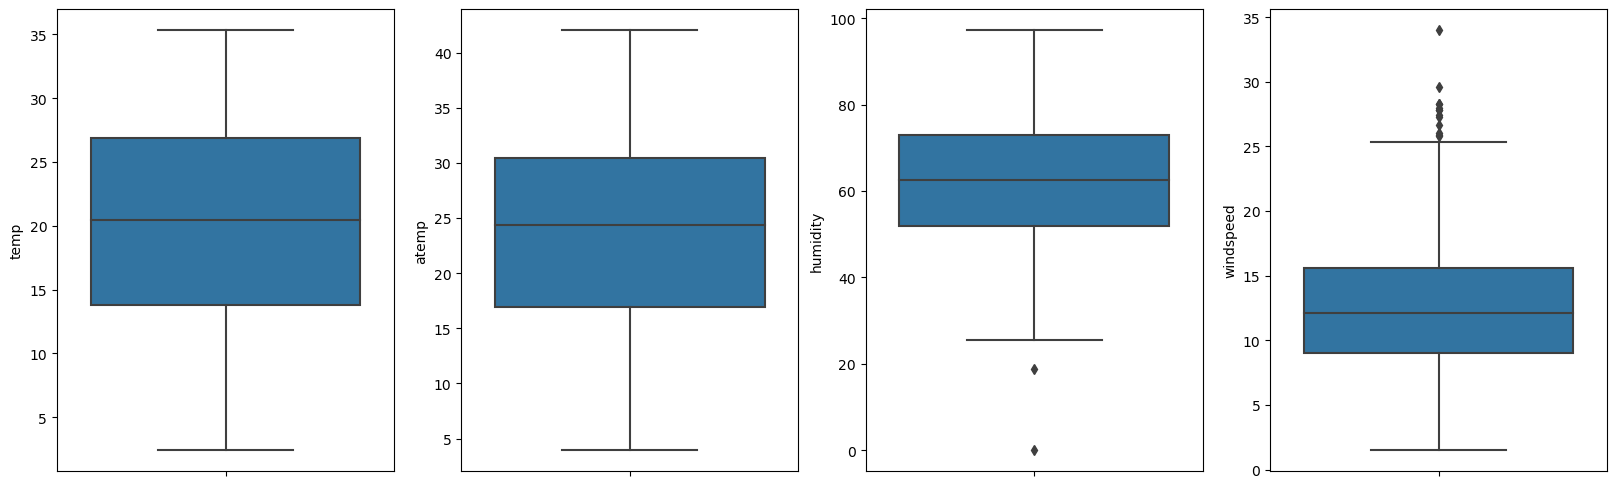

In [601]:
#Plot boxplots for numerical variables for checking outlier
columns = ['temp','atemp','humidity','windspeed']
plt.figure(figsize=(20,6))
i=1;
for column in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=column, data=df)
    i=i+1

In [602]:
#You can cleary see there are no outliers

<Figure size 1600x3200 with 0 Axes>

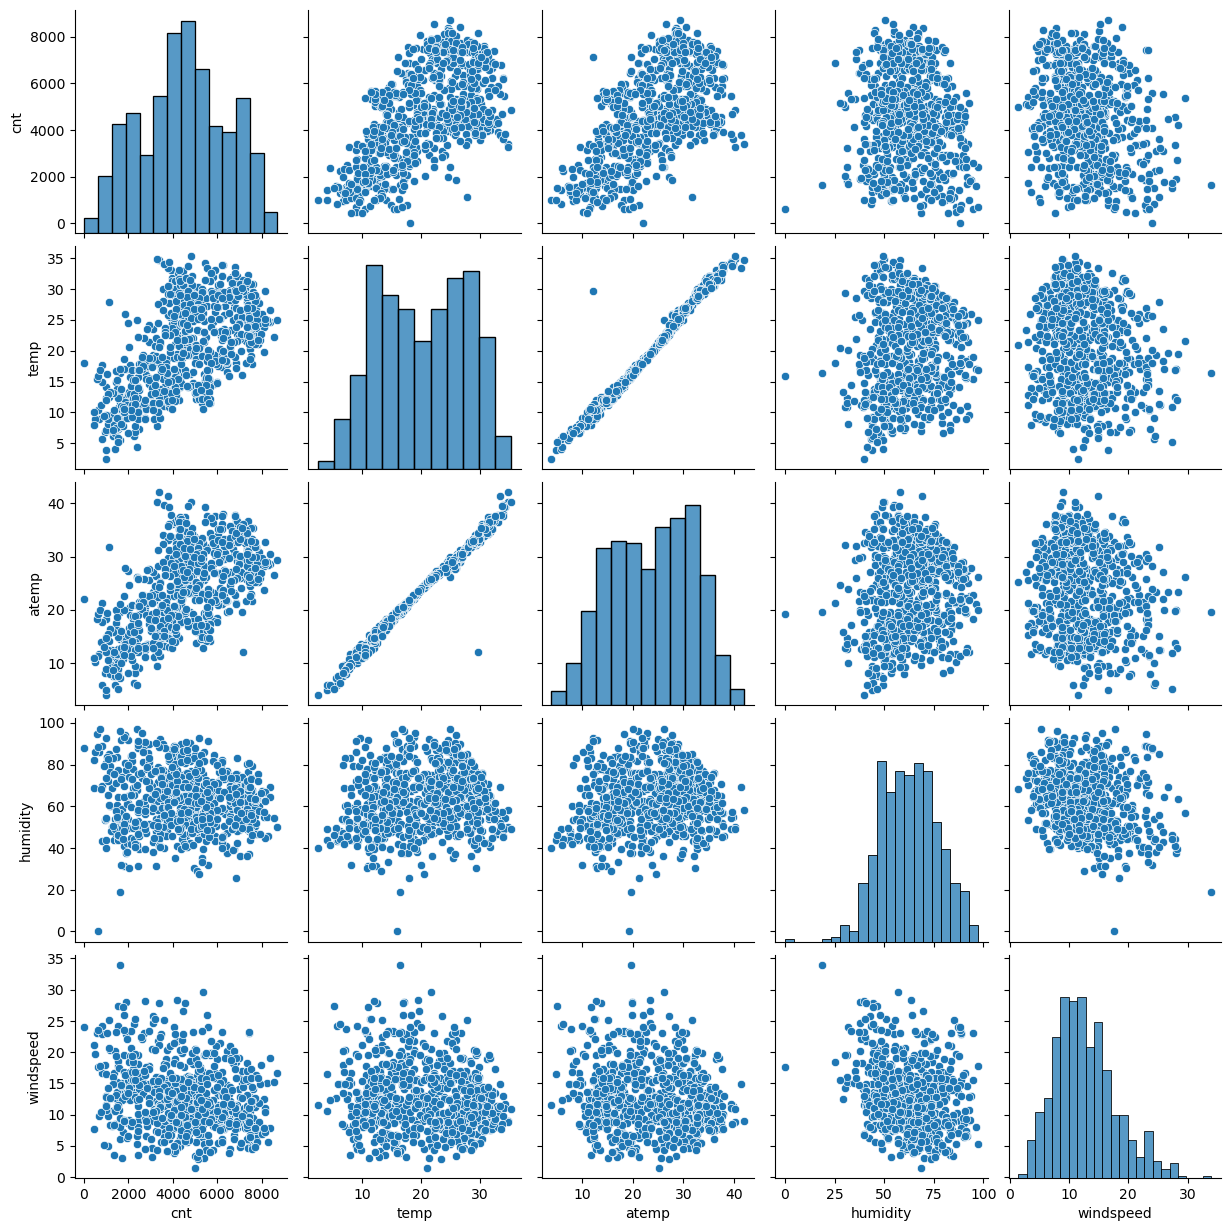

In [603]:
#Pair Plots for checking linear relationship if any
plt.figure(figsize = (16,32))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

In [604]:
#Observe how there is high correlation between temp and atemp, a linear relation

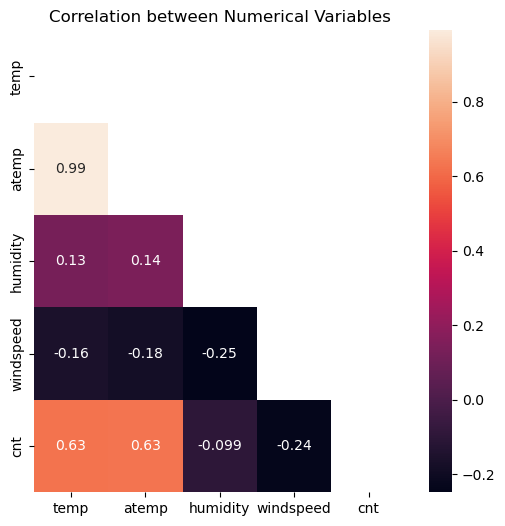

In [605]:
#Heatmap for correlation between Variables
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [606]:
#we cannot use both temp and atemp as there is very high correaltion. Which one to use we can decide seeing VIF and p -value

<Axes: xlabel='weathersit', ylabel='cnt'>

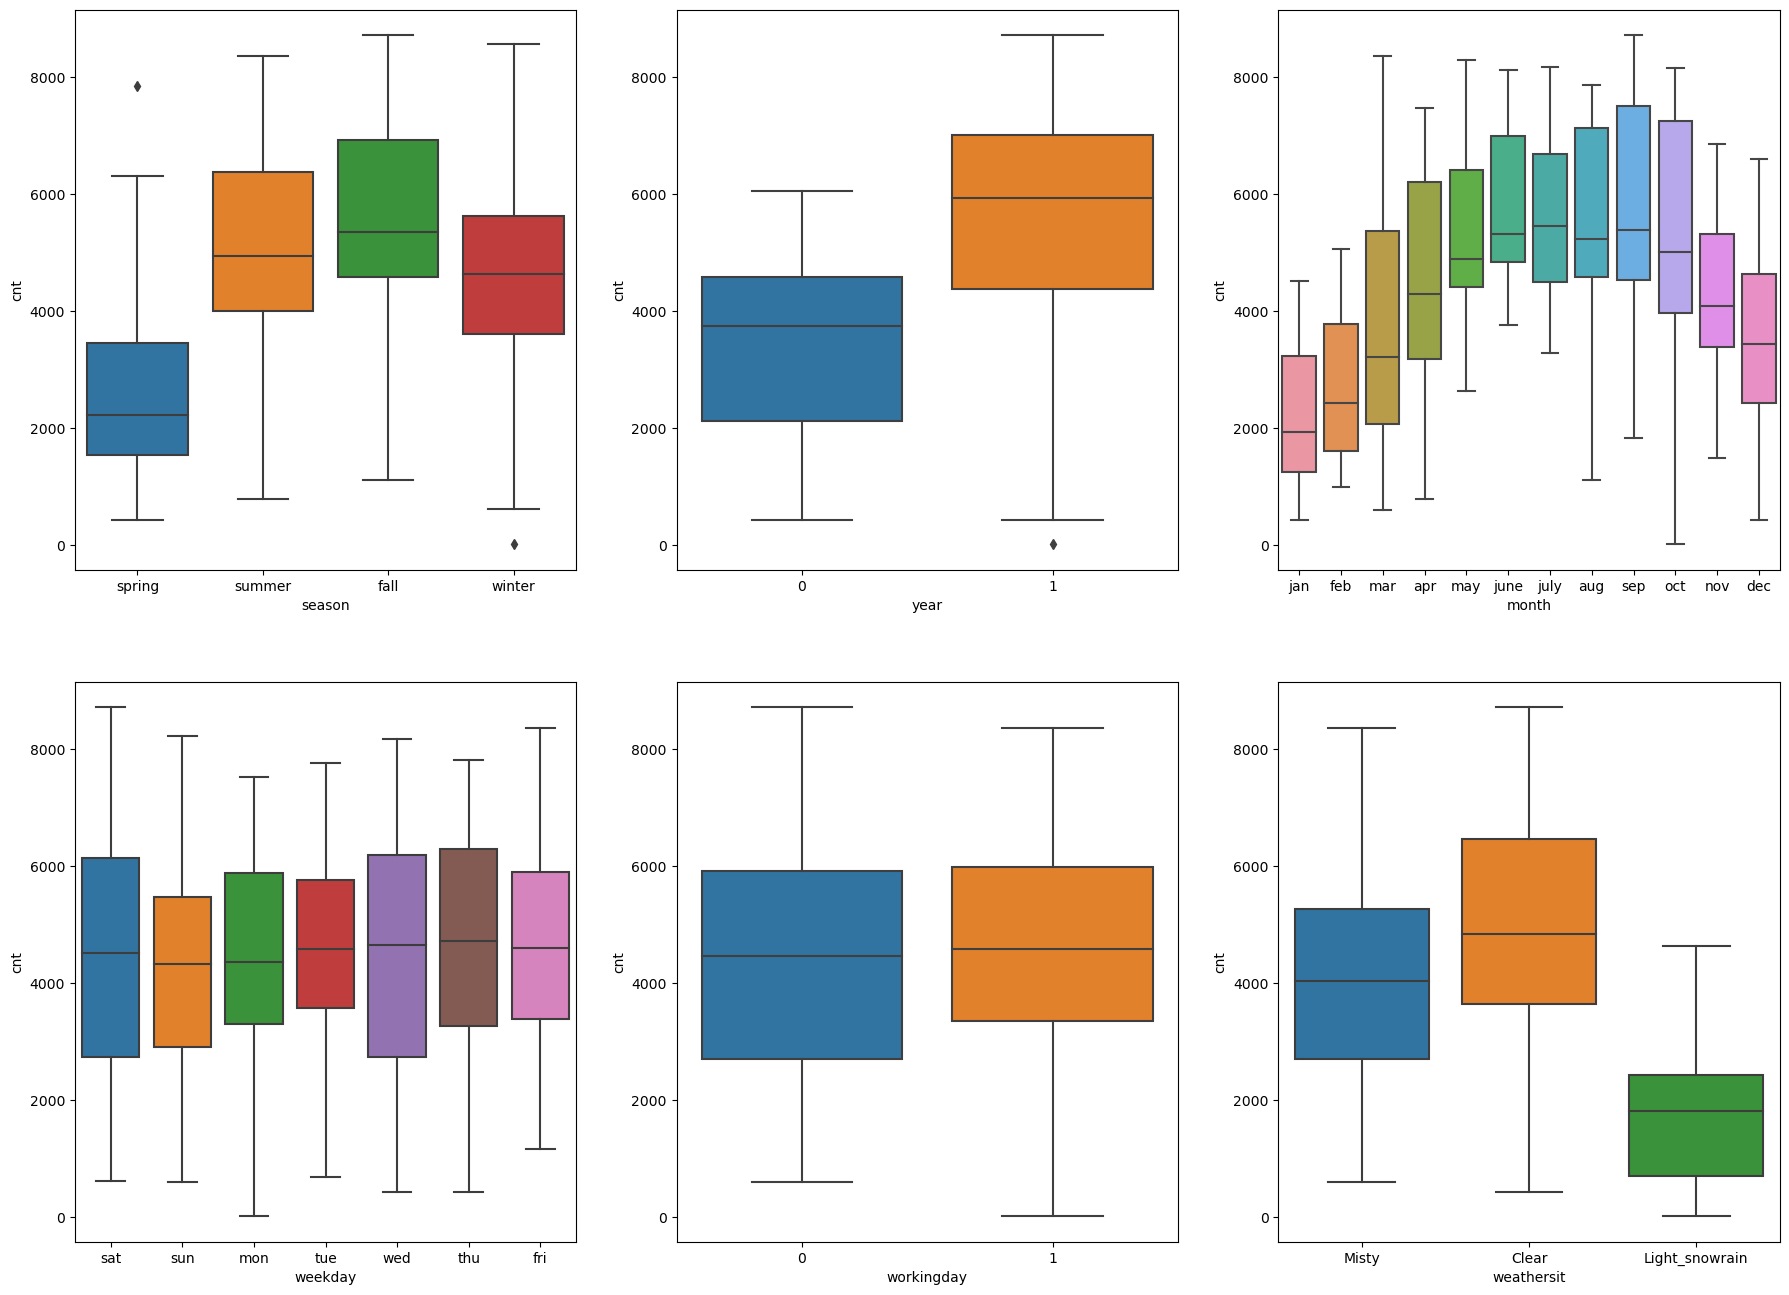

In [607]:
#Visualise Categorical Variables
plt.figure(figsize=(22,16))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='year',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='month',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)

In [608]:
#Dummy Variable creation for weekday, month, weathersit and seasons
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
months_df=pd.get_dummies(df.month,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [609]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [610]:
#Merging dummy variables to dataset
df1 = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [611]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [612]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [613]:
#Now we drop the columns for which we added dummy variable as it becomes redundant
df1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [614]:
df1.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [615]:
df1.shape

(730, 30)

In [616]:
#Split dataset into test and training set
#y is the dependent variable in the model, so separate it
y = df1.pop('cnt')
#remaining cariables will be in X
X=df1

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [617]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [618]:
print(X_train.shape)

(511, 29)


In [619]:
print(X_test.shape)

(219, 29)


In [620]:

# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']
#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [621]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [622]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


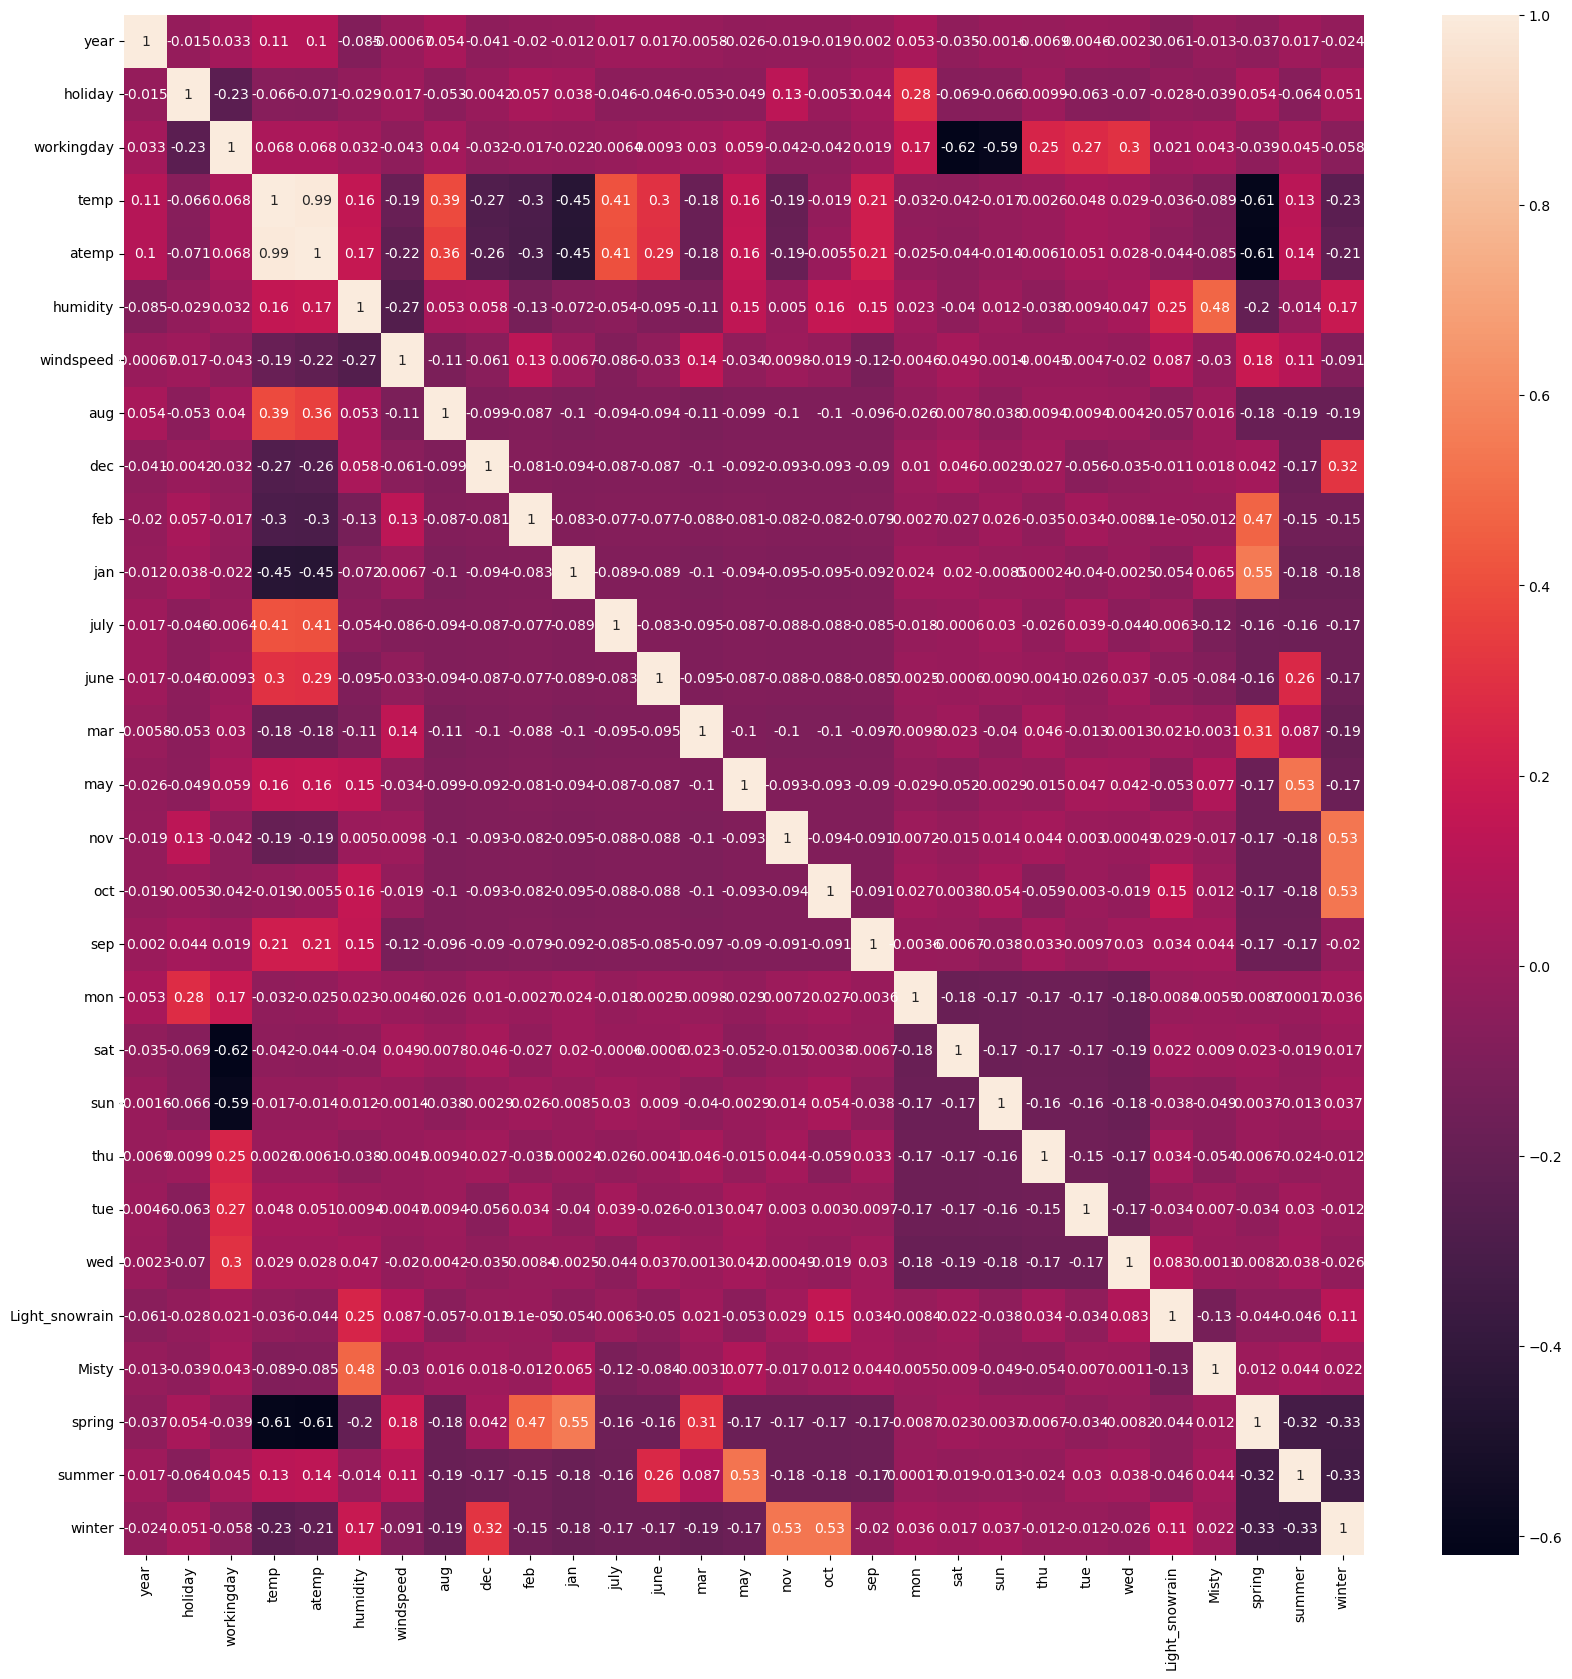

In [623]:
#check if variables are highly correlated
plt.figure(figsize = (20, 20)) 
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [624]:
#Notice temp and atemp have high correlation

In [625]:
#Lets build model using Recursive Feature Elimination
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [626]:
#
rfe = RFE(estimator=lr, n_features_to_select=15)

rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [627]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [628]:
# build a model using statsmodel api
def build_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [629]:
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [630]:
#Model 1

In [631]:
#Let us build a model selected by RFE
columns = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

In [632]:
X_train = X_train.astype({col: int for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes(include=['bool']).columns})

In [633]:
X_train_sm = sm.add_constant(X_train[columns])
lm_1 = sm.OLS(y_train, X_train_sm).fit()
print(lm_1.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.50e-191
Time:                        01:29:35   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2206.7691    314.541      7.

In [634]:
#Model 2

In [635]:
#I will drop humidity as it has high vif value
columns = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_2 = sm.OLS(y_train, X_train_sm).fit()
print(lm_2.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.18e-189
Time:                        01:29:35   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1522.3973    273.747      5.

In [636]:
#Model 3 
#Since holiday p value is high dropping it
columns = ['year', 'workingday', 'temp', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_3 = sm.OLS(y_train, X_train_sm).fit()
print(lm_3.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.37e-189
Time:                        01:29:35   Log-Likelihood:                -4125.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1453.1682    272.509      5.

In [637]:
#Model 4
#removing jan has has high p value, hence dropping it
columns = ['year', 'workingday', 'temp', 'windspeed',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_4 = sm.OLS(y_train, X_train_sm).fit()
print(lm_4.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.69e-189
Time:                        01:29:35   Log-Likelihood:                -4128.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1310.5086    266.036      4.

In [638]:
#Model 5
#removing temp as has high VIF
columns = ['year', 'workingday', 'windspeed',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_5 = sm.OLS(y_train, X_train_sm).fit()
print(lm_5.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.70e-150
Time:                        01:29:35   Log-Likelihood:                -4223.7
No. Observations:                 511   AIC:                             8471.
Df Residuals:                     499   BIC:                             8522.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4653.6612    174.712     26.

In [639]:
#Model 6
#Remove july and add temp back 

In [640]:
columns = ['year', 'workingday', 'windspeed',
       'temp', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_6 = sm.OLS(y_train, X_train_sm).fit()
print(lm_6.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.44e-189
Time:                        01:29:35   Log-Likelihood:                -4132.1
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1234.8118    266.073      4.

In [641]:
#Model 7
#Removing working day and spring
columns = ['year', 'windspeed',
       'temp', 'sep', 'sat', 'Light_snowrain', 'Misty', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_7 = sm.OLS(y_train, X_train_sm).fit()
print(lm_7.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.77e-184
Time:                        01:29:35   Log-Likelihood:                -4148.5
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     501   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1040.5622    147.809      7.

In [642]:
#Model 8
#removing saturday as has high p value and adding spring
columns = ['year', 'windspeed',
       'temp', 'sep', 'spring', 'Light_snowrain', 'Misty', 'summer',
       'winter']
X_train_sm = sm.add_constant(X_train[columns])
lm_8 = sm.OLS(y_train, X_train_sm).fit()
print(lm_8.summary())
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.89e-185
Time:                        01:29:35   Log-Likelihood:                -4146.6
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     501   BIC:                             8356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1658.6472    260.811      6.

In [643]:
lm_8.params

const             1658.647204
year              2043.032977
windspeed        -1301.107972
temp              4169.648701
sep                756.648843
spring            -500.854752
Light_snowrain   -2447.770142
Misty             -674.241062
summer             541.483859
winter             809.873553
dtype: float64

In [644]:
X_train_sm

,const,year,windspeed,temp,sep,spring,Light_snowrain,Misty,summer,winter
653,1.0,1,0.300794,0.509887,0,0,0,0,0,1
576,1.0,1,0.264686,0.815169,0,0,0,0,0,0
426,1.0,1,0.255342,0.442393,0,1,0,1,0,0
728,1.0,1,0.663106,0.245101,0,1,0,0,0,0
482,1.0,1,0.188475,0.395666,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.187140,0.863973,0,0,0,0,0,0
53,1.0,0,0.111379,0.202618,0,1,0,0,0,0
350,1.0,0,0.431816,0.248216,0,0,0,1,0,1
79,1.0,0,0.529881,0.462664,0,0,0,1,1,0


In [645]:
y_train_pred = lm_8.predict(X_train_sm)

Text(0.5, 0, 'Errors')

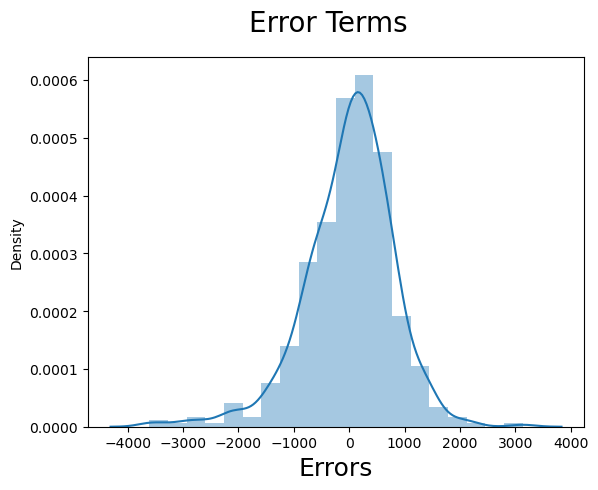

In [646]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

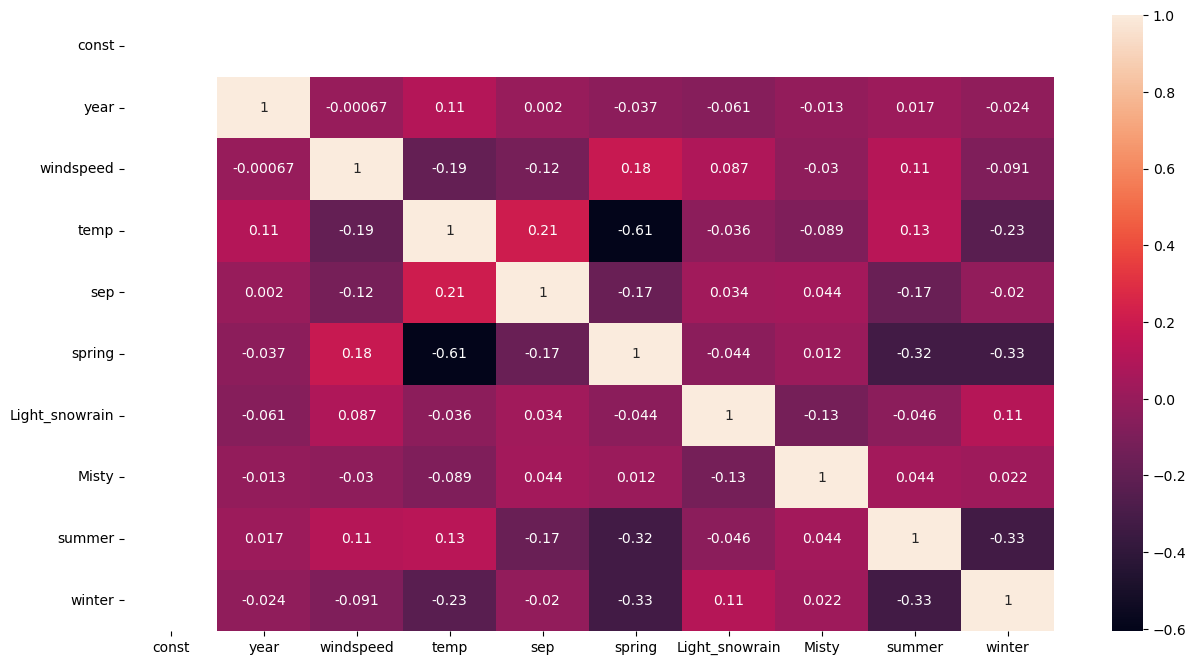

In [647]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_sm.corr(),annot = True)
plt.show()

In [648]:
#Observe no correlation between any variables as also seen in VIF

In [649]:
#Predicting Using Final Model for Test data::

In [650]:

# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [651]:
X_test = X_test[columns]
X_test.head()

,year,windspeed,temp,sep,spring,Light_snowrain,Misty,summer,winter
184,0,0.084219,0.831783,0,0,0,1,0,0
535,1,0.153728,0.901354,0,0,0,0,1,0
299,0,0.334206,0.511964,0,0,0,1,0,1
221,0,0.339570,0.881625,0,0,0,0,0,0
152,0,0.537414,0.817246,0,0,0,0,1,0


In [652]:
X_test_lm_8 = sm.add_constant(X_test)
X_test_lm_8

,const,year,windspeed,temp,sep,spring,Light_snowrain,Misty,summer,winter
184,1.0,0,0.084219,0.831783,0,0,0,1,0,0
535,1.0,1,0.153728,0.901354,0,0,0,0,1,0
299,1.0,0,0.334206,0.511964,0,0,0,1,0,1
221,1.0,0,0.339570,0.881625,0,0,0,0,0,0
152,1.0,0,0.537414,0.817246,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.287411,0.257562,0,1,0,1,0,0
702,1.0,1,0.283397,0.519232,0,0,0,0,0,1
127,1.0,0,0.069510,0.584649,0,0,0,0,1,0
640,1.0,1,0.052115,0.745598,0,0,0,1,0,1


In [653]:
y_pred = lm_8.predict(X_test_lm_8)

In [654]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
400    2947
702    6606
127    4333
640    7572
72     2046
Name: cnt, Length: 219, dtype: int64

In [655]:
y_pred

184    4343.073174
535    7801.477350
299    3494.150516
221    4892.898395
152    4908.525114
          ...     
400    3226.572835
702    6307.837701
127    4547.473649
640    6878.387148
72     2275.599386
Length: 219, dtype: float64

In [656]:
#calcluate r2 on test data
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8009

In [657]:
#Calculate adjusted r2 on test data
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7923


Text(0, 0.5, 'y_pred')

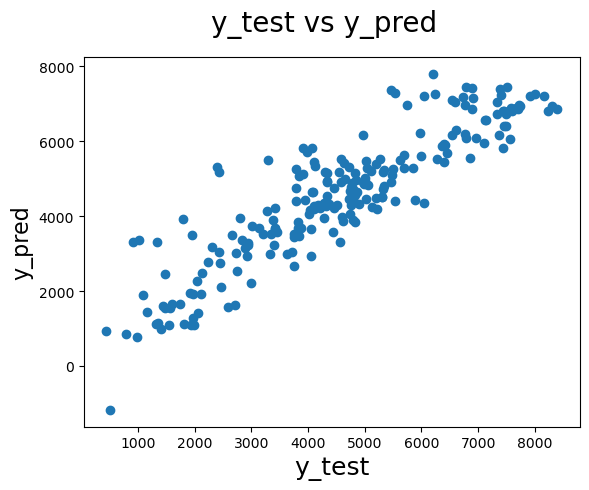

In [658]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

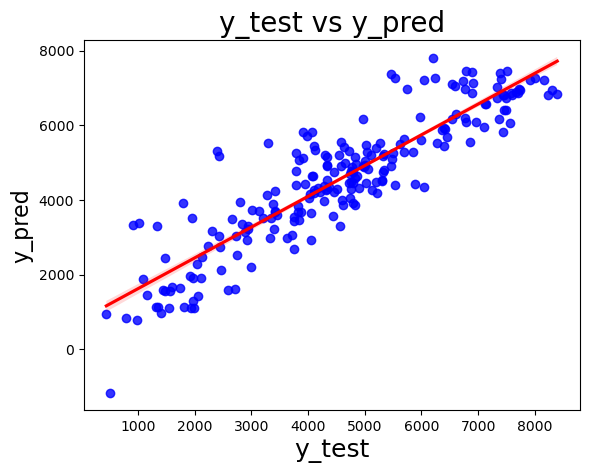

In [659]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [660]:
#Comparison of r2 and adjusted r2 for test and train data
#r2 for Train data : 0.828
#Adjusted r2 for Train data : 0.825
#r2 for Train data : 0.8009
#Adjusted r2 for Train data : 0.7923

In [661]:
#All important Variables which affect the demand of Bike sharing
#'year', 'windspeed','temp', 'sep', 'spring', 'Light_snowrain', 'Misty', 'summer','winter'